<a href="https://colab.research.google.com/github/memetics19/Advance-Logistic-Regression/blob/master/For_cat_target_value%2C_only_train_with_cat_values_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 1. We are importing WARNINGS class to suppress any warning

In [0]:
import warnings 
warnings.filterwarnings('ignore')

##### 2. We are now importing all necessary packages for our report

In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import lightgbm as lgbm

pd.set_option('display.max_columns', 500)

##### 3. We will now load the dataset

In [0]:
data = pd.read_csv("/content/drive/My Drive/training_v2.csv")

##### 4. Let us have a preview of the data

In [0]:
data.drop('encounter_id', axis=1, inplace= True)
data.head()

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,

##### 5. Let us see the no. of rows and columns in this dataset

In [0]:
print("Dataset contains -",data.shape[0],"rows and",data.shape[1],"columns")

Dataset contains - 91713 rows and 185 columns


In [0]:
df_cat_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
for cat_col in df_cat_columns:
    data[cat_col] = data[cat_col].fillna(data[cat_col].mode()[0])

In [0]:
df_cat_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

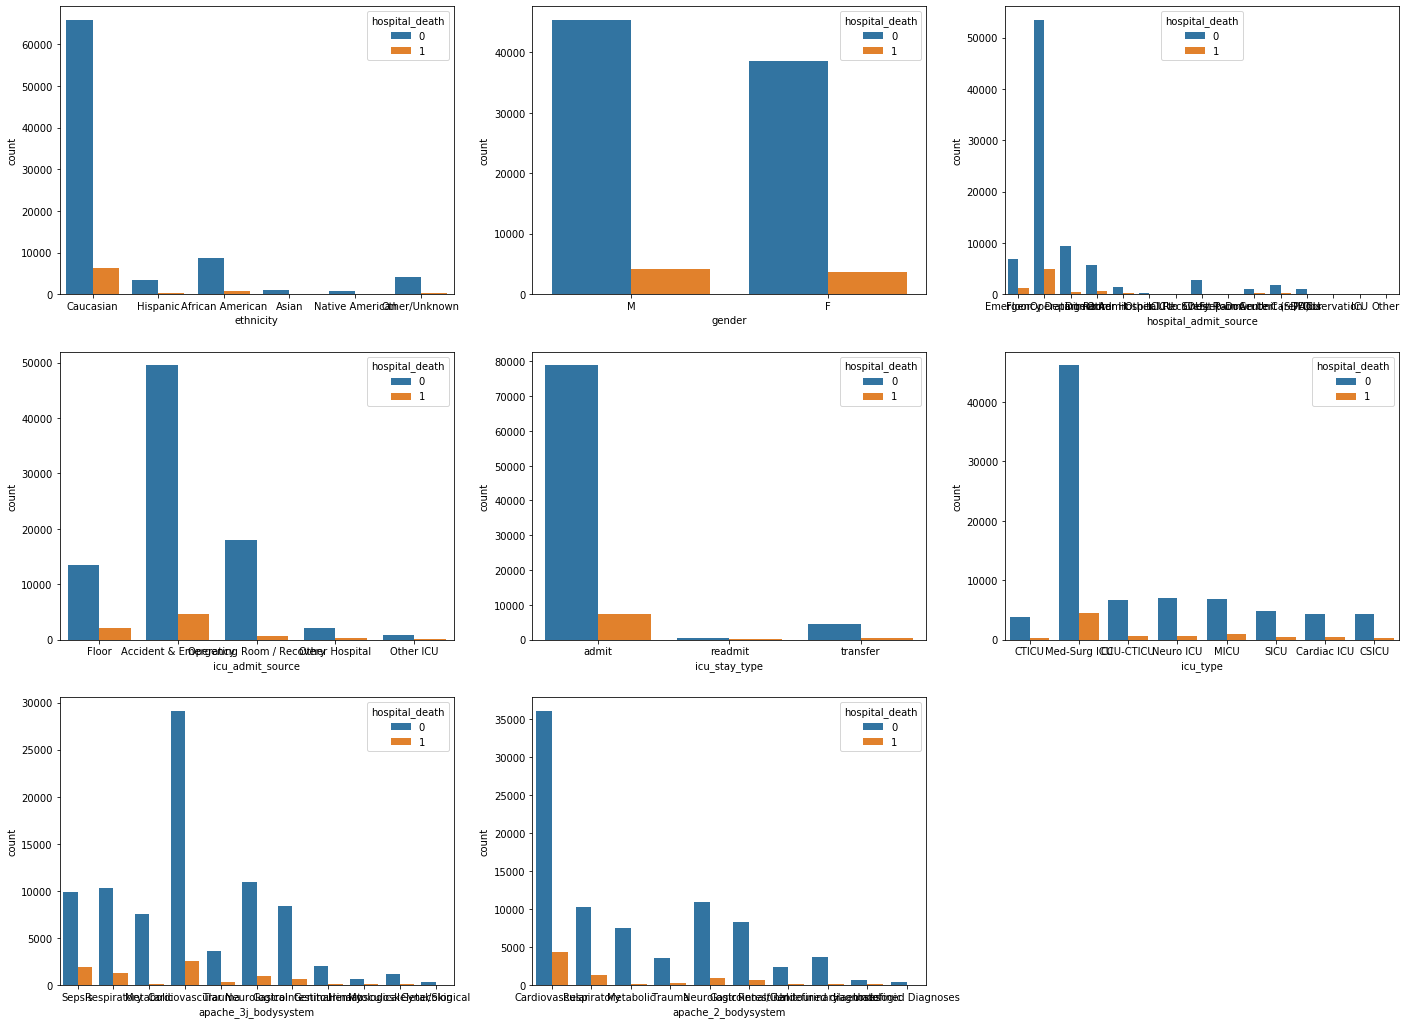

In [0]:
# Now we are creating a new DataFrame named "obj_cols" from the old DataFrame 'data' which will have columns with only OBJECT as its datatype
obj_cols = [*data.select_dtypes('object').columns]
obj_cols1 = obj_cols

# Setting up the height & width of the plot we will make below
plt.figure(figsize=(24, 18))

# We are using a For-loop to plot 6 graphs in one plot using "obj_cols" as our refernce dataset
for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= data, hue='hospital_death')

(a) Converting Categorical Variables to Numerical

In [0]:
hospital_apache_2_bodysystem = list(set(data.apache_2_bodysystem))
hospital_apache_2_bodysystem

['Respiratory',
 'Renal/Genitourinary',
 'Undefined Diagnoses',
 'Cardiovascular',
 'Haematologic',
 'Trauma',
 'Gastrointestinal',
 'Metabolic',
 'Neurologic',
 'Undefined diagnoses']

In [0]:
data.ethnicity[data.ethnicity == 'African American'] = 1
data.ethnicity[data.ethnicity == 'Native American'] = 2
data.ethnicity[data.ethnicity == 'Other/Unknown'] = 3
data.ethnicity[data.ethnicity == 'Caucasian'] = 4
data.ethnicity[data.ethnicity == 'Hispanic'] = 5
data.ethnicity[data.ethnicity == 'Asian'] = 6

data.gender[data.gender == 'M'] = 1
data.gender[data.gender == 'F'] = 2

data.hospital_admit_source[data.hospital_admit_source == 'Floor'] = 1
data.hospital_admit_source[data.hospital_admit_source == 'Observation'] = 2
data.hospital_admit_source[data.hospital_admit_source == 'Emergency Department'] = 3
data.hospital_admit_source[data.hospital_admit_source == 'Other Hospital'] = 4
data.hospital_admit_source[data.hospital_admit_source == 'Step-Down Unit (SDU)'] = 5
data.hospital_admit_source[data.hospital_admit_source == 'ICU to SDU'] = 6
data.hospital_admit_source[data.hospital_admit_source == 'Chest Pain Center'] = 7
data.hospital_admit_source[data.hospital_admit_source == 'ICU'] = 8
data.hospital_admit_source[data.hospital_admit_source == 'Acute Care/Floor'] = 9
data.hospital_admit_source[data.hospital_admit_source == 'Direct Admit'] = 10
data.hospital_admit_source[data.hospital_admit_source == 'Recovery Room'] = 11
data.hospital_admit_source[data.hospital_admit_source == 'Operating Room'] = 12
data.hospital_admit_source[data.hospital_admit_source == 'PACU'] = 13
data.hospital_admit_source[data.hospital_admit_source == 'Other'] = 14
data.hospital_admit_source[data.hospital_admit_source == 'Other ICU'] = 15

data.icu_admit_source[data.icu_admit_source == 'Floor'] = 1
data.icu_admit_source[data.icu_admit_source == 'Accident & Emergency'] = 2
data.icu_admit_source[data.icu_admit_source == 'Other Hospital'] = 3
data.icu_admit_source[data.icu_admit_source == 'Operating Room / Recovery'] = 4
data.icu_admit_source[data.icu_admit_source == 'Other ICU'] = 5

data.icu_stay_type[data.icu_stay_type == 'readmit'] = 1
data.icu_stay_type[data.icu_stay_type == 'transfer'] = 2
data.icu_stay_type[data.icu_stay_type == 'admit'] = 3

data.icu_type[data.icu_type == 'CTICU'] = 1
data.icu_type[data.icu_type == 'CCU-CTICU'] = 2
data.icu_type[data.icu_type == 'SICU'] = 3
data.icu_type[data.icu_type == 'CSICU'] = 4
data.icu_type[data.icu_type == 'MICU'] = 5
data.icu_type[data.icu_type == 'Cardiac ICU'] = 6
data.icu_type[data.icu_type == 'Neuro ICU'] = 7
data.icu_type[data.icu_type == 'Med-Surg ICU'] = 8

data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Hematological'] = 1
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Genitourinary'] = 2
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Respiratory'] = 3
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Sepsis'] = 4
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Cardiovascular'] = 5
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Trauma'] = 6
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Gastrointestinal'] = 7
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Metabolic'] = 8
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Musculoskeletal/Skin'] = 9
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Neurological'] = 10
data.apache_3j_bodysystem[data.apache_3j_bodysystem == 'Gynecological'] = 11

data.apache_2_bodysystem[data.apache_2_bodysystem == 'Respiratory'] = 1
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Renal/Genitourinary'] = 2
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Undefined Diagnoses'] = 3
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Cardiovascular'] = 4
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Haematologic'] = 5
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Trauma'] = 6
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Gastrointestinal'] = 7
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Metabolic'] = 8
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Neurologic'] = 9
data.apache_2_bodysystem[data.apache_2_bodysystem == 'Undefined diagnoses'] = 10


(b) Filling missing values by random function

In [0]:
df_cat_columns

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [0]:
hospital_apache_2_bodysystem = list(set(data.apache_2_bodysystem))
hospital_apache_2_bodysystem

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [0]:
dict_apache_2_bodysystem = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data.apache_2_bodysystem.fillna(np.random.choice(dict_apache_2_bodysystem), inplace=True)

In [0]:
# Now we are creating a new DataFrame named "obj_cols" from the old DataFrame 'data' which will have columns with only OBJECT as its datatype
obj_cols = [*data.select_dtypes('object').columns]
obj_cols1 = obj_cols

# Setting up the height & width of the plot we will make below
plt.figure(figsize=(24, 18))

# We are using a For-loop to plot 6 graphs in one plot using "obj_cols" as our refernce dataset
for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3, 3, idx+1)
    
    sns.countplot(cols, data= data, hue='hospital_death')

<Figure size 1728x1296 with 0 Axes>

### Now we will start preparing ML models and compare their scores to select the best accurate model

In [0]:
# Here we are creating a DataFrame named 'dummies' by using '.get_dummies' function of pandas which will convert all categorical variables to dummy variables
dummies = pd.get_dummies(data, drop_first=True)
dummies.info()

# 'SimpleImputer()' function is used to fill missing values in a DataFrame
SimImp = SimpleImputer()

# We are now creating a new DataFrame named 'train' which will be like our original dataset named 'data' but with no missing values
train= pd.DataFrame(SimImp.fit_transform(dummies), columns=dummies.columns)
train.info()

# We are selecting all the numerical columns and making a new DataFrame with name 'num_cols'
num_cols = [*data.select_dtypes(['Int64', 'Float64']).columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 185 entries, patient_id to apache_2_bodysystem
dtypes: float64(170), int64(15)
memory usage: 129.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 185 entries, patient_id to apache_2_bodysystem
dtypes: float64(185)
memory usage: 129.4 MB


In [0]:
# We are creating a new DataFrame named 'obj_train' from the old Train DataFrame by removing all the numerical columns from it
# obj_train = train.drop(num_cols, axis=1)
# obj_train.info()

# For ML modelling, we'll only use the categorical features for training 
X, y = train.drop('hospital_death', axis=1), train.hospital_death

# We will split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify= y)

1. Logistic Regression

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_score = round(log_reg.score(X_train, y_train) * 100, 2)

2. Ada Boost Classifier 

In [0]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
abc_score = round(abc.score(X_train, y_train) * 100, 2)

3. LogisticRegressionCV

In [0]:
lrcv = LogisticRegressionCV()
lrcv.fit(X_train,y_train)
lrcv_pred = lrcv.predict(X_test)
lrcv_score = round(lrcv.score(X_train, y_train) * 100, 2)

4. Stochastic Gradient Descent (SGD) Classifier

In [0]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd_pred = sgd.predict(X_test)
sgd_score = round(sgd.score(X_train, y_train) * 100, 2)

5. XG Boost

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = round(xgb.score(X_train, y_train) * 100, 2)

##### We will now check scores of all the models by comparing against each other

In [0]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Ada Boost Classifier', 
              'LogisticRegressionCV', 'SGD Classifier', 
              'XG Boost'],
    'Score': [log_score, abc_score, 
              lrcv_score, sgd_score, xgb_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,XG Boost,93.36
1,Ada Boost Classifier,92.75
2,LogisticRegressionCV,92.14
0,Logistic Regression,91.67
3,SGD Classifier,80.86
